In [264]:
import pandas as pd
import matplotlib.pyplot as plt

In [265]:
# loading the sheets
file_path = r'C:\Users\user\Desktop\Assignment\question_1_2.xlsx'
measurements_df = pd.read_excel(file_path, sheet_name='Measurements' ,skiprows=1)  
specifications_df = pd.read_excel(file_path, sheet_name='Specifications' ,skiprows=1)
production_sequence_df = pd.read_excel(file_path, sheet_name='Production_Sequence' ,skiprows=1)


print(measurements_df.head())

# checking if there are null values 
null_columns = measurements_df.isnull().any()
print(null_columns)

    Lot No  Unit Product Code  T_Height  T_Weight
0  DLS0081     1     LIF001_B     8.644    384.63
1  DLS0081     2     LIF001_B     9.228    384.63
2  DLS0081     3     LIF001_B     8.811    385.19
3  DLS0081     4     LIF001_B     9.080    385.19
4  DLS0082     1     LIF001_Y    10.549    375.00
Lot No          False
Unit            False
Product Code    False
T_Height        False
T_Weight        False
dtype: bool


In [266]:
print(specifications_df.head())

# checking if there are null values 
null_columns = specifications_df.isnull().any()
print(null_columns)

  Product Code    T_Name     LSL     USL  Target
0     LIF001_B  T_height    7.22   10.57    8.78
1     LIF001_Y  T_height    6.78   10.07    8.36
2     LIF002_R  T_height    7.22   10.57    8.78
3     LIF002_Y  T_height    6.78   10.07    8.36
4     LIF001_B  T_weight  360.00  470.00  410.00
Product Code    False
T_Name          False
LSL             False
USL             False
Target          False
dtype: bool


In [267]:
print(production_sequence_df.head())

# checking if there are null values 
null_columns = production_sequence_df.isnull().any()
print(null_columns)

   Order ID       Date Product Family Variant
0         1 2022-05-14         LIF001       B
1         2 2022-06-02         LIF001       Y
2         3 2022-06-17         LIF001       B
3         4 2022-07-01         LIF003       B
4         5 2022-07-17         LIF002       R
Order ID          False
 Date             False
Product Family    False
Variant           False
dtype: bool


## Question 1.1

In [268]:
# grouping by product code and calculating the mean and sample standard deviation for height and weight
result = measurements_df.groupby('Product Code').agg({
    'T_Height': ['mean', 'std'],
    'T_Weight': ['mean', 'std']
}).reset_index()

# renaming the columns for clarity
result.columns = ['Product_Code', 'Mean_Height', 'Std_Height', 'Mean_Weight', 'Std_Weight']

# printing the result
print(result)

  Product_Code  Mean_Height  Std_Height  Mean_Weight  Std_Weight
0     LIF001_B      8.94075    0.262551     384.9100    0.323316
1     LIF001_Y     10.26850    0.852276     382.8250    7.287700
2     LIF002_R      9.30775    0.893526     314.7225   17.176708
3     LIF002_Y      8.18975    0.452906     523.7950    6.458506


## Question 1.2

In [269]:
# determining the defects based on USL
defects = []
for index, row in measurements_df.iterrows():
    product_code = row['Product Code']
    height = row['T_Height']
    weight = row['T_Weight']
    
    # getting the USL for height and weight for the product code
    height_usl = specifications_df[(specifications_df['Product Code'] == product_code) & 
                                   (specifications_df['T_Name'] == 'T_height')]['USL'].values[0]
    weight_usl = specifications_df[(specifications_df['Product Code'] == product_code) & 
                                   (specifications_df['T_Name'] == 'T_weight')]['USL'].values[0]
    
    # checking for defects
    if height > height_usl or weight > weight_usl:
        defects.append(product_code)

# counting defects by product code
defect_counts = pd.Series(defects).value_counts()


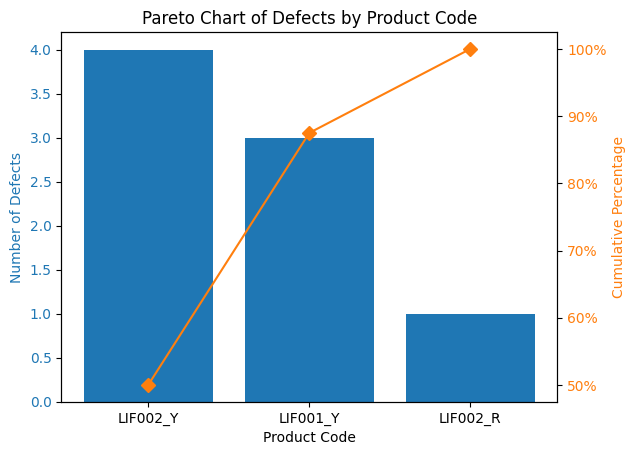

LIF002_Y    4
LIF001_Y    3
LIF002_R    1
Name: count, dtype: int64

In [270]:
# pLotting pareto chart by product code
defect_counts.sort_values(ascending=False, inplace=True)
cumulative_sum = defect_counts.cumsum()
cumulative_percentage = 100 * cumulative_sum / defect_counts.sum()

fig, ax1 = plt.subplots()

ax1.bar(defect_counts.index, defect_counts, color='C0')
ax1.set_xlabel('Product Code')
ax1.set_ylabel('Number of Defects', color='C0')
ax1.tick_params(axis='y', labelcolor='C0')

ax2 = ax1.twinx()
ax2.plot(defect_counts.index, cumulative_percentage, color='C1', marker='D', ms=7)
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f}%'))
ax2.set_ylabel('Cumulative Percentage', color='C1')
ax2.tick_params(axis='y', labelcolor='C1')

plt.title('Pareto Chart of Defects by Product Code')
plt.show()

defect_counts

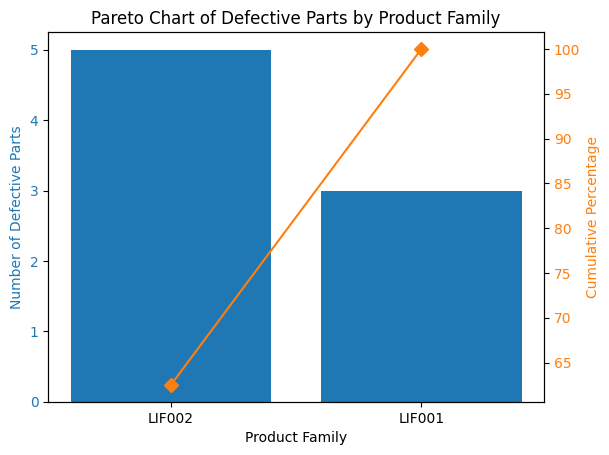

In [271]:
# cumulative sum of defects
defective_counts['Cumulative_Percentage'] = defective_counts['Defective_Count'].cumsum() / defective_counts['Defective_Count'].sum() * 100

# plotting pareto chart by product family
fig, ax1 = plt.subplots()

# bar plot
ax1.bar(defective_counts['Product_Family'], defective_counts['Defective_Count'], color='C0')
ax1.set_xlabel('Product Family')
ax1.set_ylabel('Number of Defective Parts', color='C0')
ax1.tick_params(axis='y', labelcolor='C0')

# line plot
ax2 = ax1.twinx()
ax2.plot(defective_counts['Product_Family'], defective_counts['Cumulative_Percentage'], color='C1', marker='D', ms=7)
ax2.set_ylabel('Cumulative Percentage', color='C1')
ax2.tick_params(axis='y', labelcolor='C1')

plt.title('Pareto Chart of Defective Parts by Product Family')
plt.show()

## Question 1.3

In [272]:
# capitalizing each third letter in column T_Name to be compatible with columns T_Height and T_Weight
def capitalize_third_letter(s):
    if len(s) >= 3:
        return s[:2] + s[2].upper() + s[3:]
    return s

specifications_df['T_Name'] = specifications_df['T_Name'].apply(capitalize_third_letter)

print(specifications_df)

  Product Code    T_Name     LSL     USL  Target
0     LIF001_B  T_Height    7.22   10.57    8.78
1     LIF001_Y  T_Height    6.78   10.07    8.36
2     LIF002_R  T_Height    7.22   10.57    8.78
3     LIF002_Y  T_Height    6.78   10.07    8.36
4     LIF001_B  T_Weight  360.00  470.00  410.00
5     LIF001_Y  T_Weight  329.00  500.00  410.00
6     LIF002_R  T_Weight  329.00  500.00  385.00
7     LIF002_Y  T_Weight  329.00  500.00  410.00


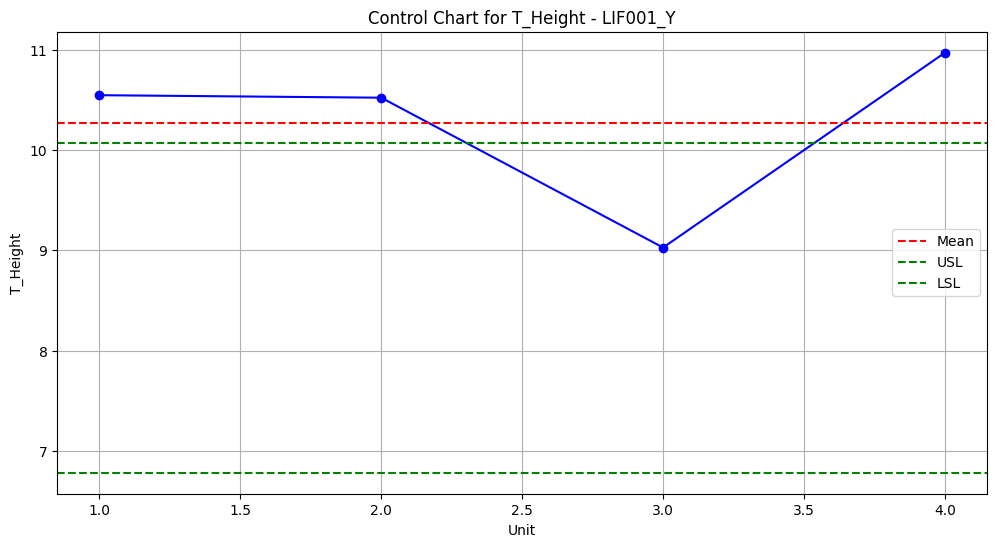

In [273]:
specifications_df['T_Name'] = specifications_df['T_Name'].apply(capitalize_third_letter)

# getting the data for LIF001_Y and LIF002_Y
lif001_y = measurements_df[measurements_df['Product Code'] == 'LIF001_Y']
lif002_y = measurements_df[measurements_df['Product Code'] == 'LIF002_Y']

# getting the LSL and USL for T_Height and T_Weight
lif001_y_specs = specifications_df[specifications_df['Product Code'] == 'LIF001_Y']
lif002_y_specs = specifications_df[specifications_df['Product Code'] == 'LIF002_Y']

# this Function is to plot control charts using specification limits
def control_chart_plot(product_family, specs, t_name, title, ylabel):
    lsl = specs[specs['T_Name'] == t_name]['LSL'].values[0]
    usl = specs[specs['T_Name'] == t_name]['USL'].values[0]
    mean = product_family[t_name].mean()
    
    plt.figure(figsize=(12, 6))
    plt.plot(product_family['Unit'], product_family[t_name], marker='o', linestyle='-', color='b')
    plt.axhline(mean, color='r', linestyle='--', label='Mean')
    plt.axhline(usl, color='g', linestyle='--', label='USL')
    plt.axhline(lsl, color='g', linestyle='--', label='LSL')
    plt.title(title)
    plt.xlabel('Unit')
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)
    plt.show()

# plotting control charts for T_Height
control_chart_plot(lif001_y, lif001_y_specs, 'T_Height', 'Control Chart for T_Height - LIF001_Y', 'T_Height')

#### - 3 of the points are greater than the UCL 
#### - Data points are randomly distributed 
#### - Mean is far from the target


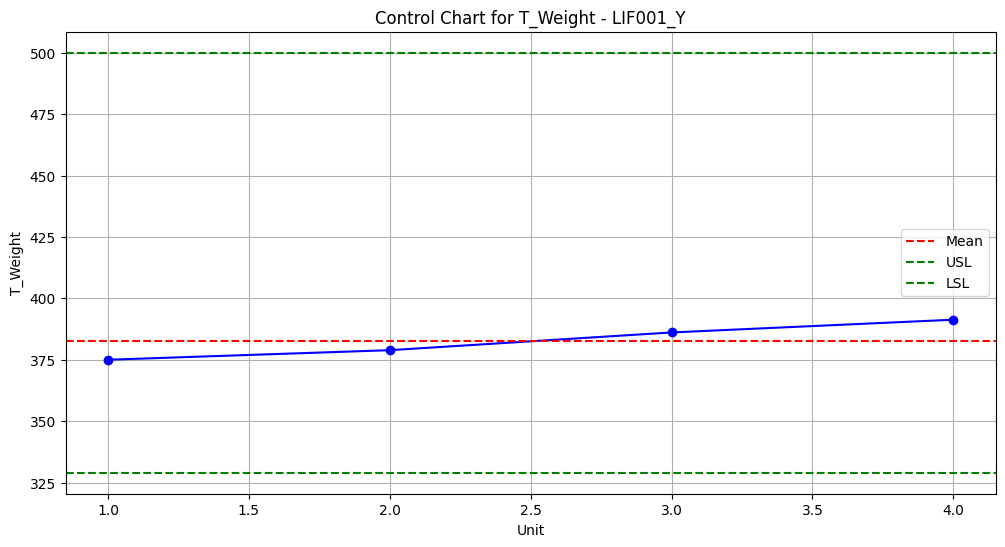

In [274]:
control_chart_plot(lif001_y, lif001_y_specs, 'T_Weight', 'Control Chart for T_Weight - LIF001_Y', 'T_Weight')

#### - All of the data points are within UCL and LSL  
#### - Data points show a slightly increasing pattern
#### - Mean is relatively close from the target

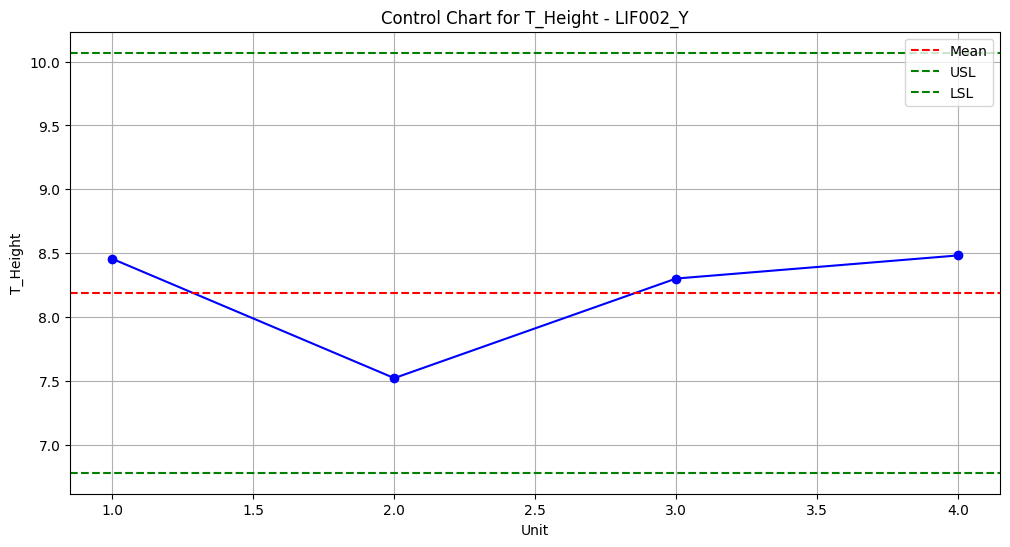

In [275]:
control_chart_plot(lif002_y, lif002_y_specs, 'T_Height', 'Control Chart for T_Height - LIF002_Y', 'T_Height')

#### - All of the data points are within UCL and LSL  
#### - Data points are randomly distributed
#### - Mean is close from the target

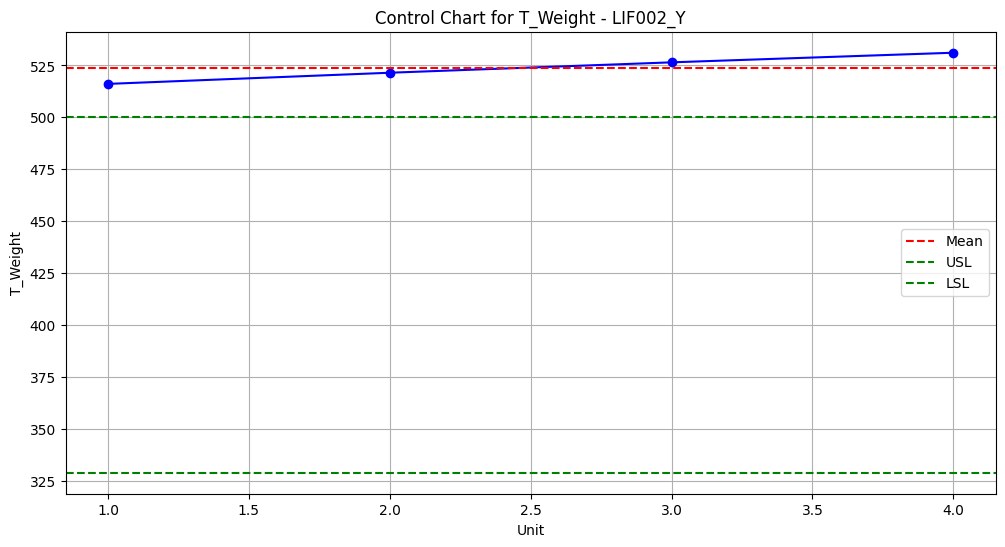

In [276]:
control_chart_plot(lif002_y, lif002_y_specs, 'T_Weight', 'Control Chart for T_Weight - LIF002_Y', 'T_Weight')

#### - All of the data points are greater than the UCL 
#### - Data points show a slightly increasing pattern
#### - Mean is far from the target

### After making comparisons between LIF001 and LIF002 product families, the product family LIF001 shows better process control because it has less data points that are greater than UCL. 
### I used Control charts to visualize the data.


## Question 1.4

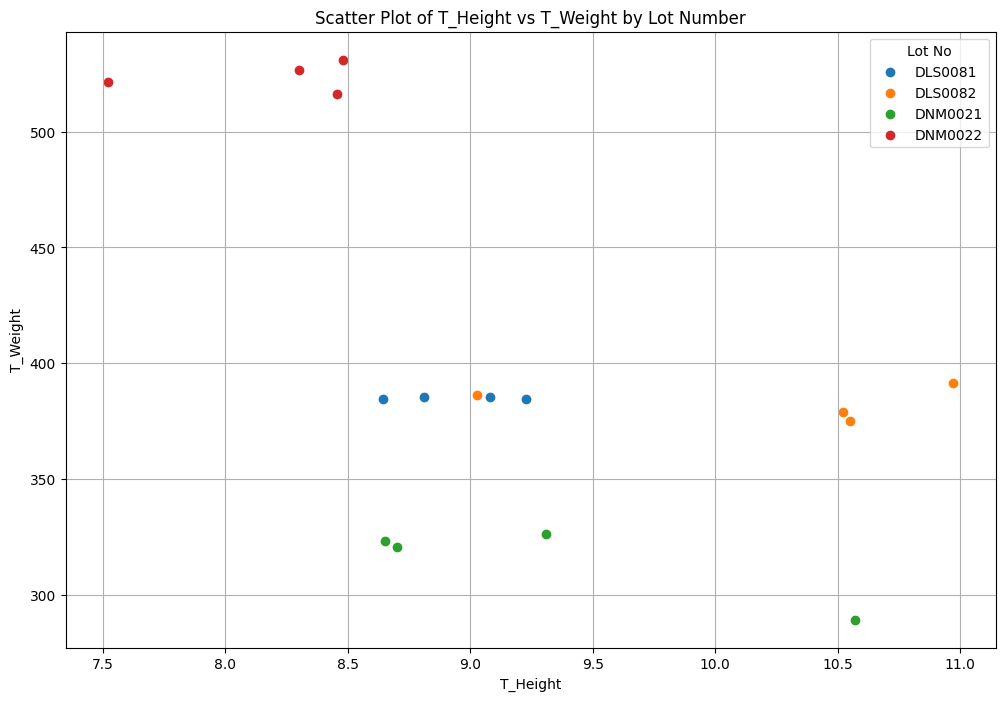

In [277]:
# creating scatter plots
plt.figure(figsize=(12, 8))

# scatter plot for each lot number
for lot in measurements_df['Lot No'].unique():
    lot_data = measurements_df[measurements_df['Lot No'] == lot]
    plt.scatter(lot_data['T_Height'], lot_data['T_Weight'], label=lot)

plt.title('Scatter Plot of T_Height vs T_Weight by Lot Number')
plt.xlabel('T_Height')
plt.ylabel('T_Weight')
plt.legend(title='Lot No')
plt.show()

## Question 1.5

### It is not possible to project the test variation, because there are no historical data for products 7 and 8 that has the variant G in the Measurements table, we need height and weight measurements for them.